Кравчук Євгеній, Малик Дмитро

### 1.2 Дослідження роботи алгоритмів Белмана-Форда та Флойда-Воршала

У цьому експерименті ми аналізуємо роботу алгоритмів найкоротших шляхів в графі: Белмана-Форда та Флойда-Воршала. Також, ми досліджуємо поведінку цих алгоритмів у графах з від'ємними вагами ребер та у графах з циклами від'ємної ваги.

### Імпорт та необхідні функції 

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby
import time
from tqdm import tqdm
from networkx.algorithms import tree
from networkx.algorithms import floyd_warshall_predecessor_and_distance
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [ ]:
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)

        
    return G

In [ ]:
def draw_graph(graph):
    plt.figure(figsize=(10,6))
    if isinstance(graph, nx.DiGraph):
        # draw with edge weights
        pos = nx.spring_layout(graph)
        nx.draw(graph,pos, node_color='lightblue', 
                with_labels=True,
                node_size=500, 
                arrowsize=20, 
                arrows=True)
        labels = nx.get_edge_attributes(graph,'weight')
        nx.draw_networkx_edge_labels(graph, pos,edge_labels=labels)
        
    else:
        pos = nx.spring_layout(graph)
        nx.draw(graph,pos, node_color='lightblue', 
                with_labels=True,
                node_size=500)
        labels = nx.get_edge_attributes(graph,'weight')
        nx.draw_networkx_edge_labels(graph, pos,edge_labels=labels)

In [ ]:
def count_time(function, size):
    time_taken = 0
    for _ in tqdm(range(100)):

        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        function(G)
        end = time.time()

        time_taken += end - start

    return time_taken / 100

### Алгоритм Флойда-Воршала

In [ ]:
G = gnp_random_connected_graph(5, 0.6, True, True)

In [ ]:
def convert_to_matrix_for_warshall(graph):
    directed = isinstance(graph, nx.DiGraph)
    edge_weights = nx.get_edge_attributes(graph, 'weight')
    matrix = [[float("inf") for i in range(len(graph.nodes))] for j in range(len(graph.nodes))]

    if not directed:
        edge_weights_copy = dict()
        for edge in edge_weights:
            edge_weights_copy[edge] = edge_weights[edge]
            edge_weights_copy[edge[::-1]] = edge_weights[edge]

        edge_weights = edge_weights_copy

    for edge in edge_weights:
        matrix[edge[0]][edge[1]] = edge_weights[edge]
    
    for i in range(len(matrix)):
        matrix[i][i] = 0

    return matrix

In [ ]:
def floyd_warshall_algo(graph):

    matrix = convert_to_matrix_for_warshall(graph)

    n = len(matrix)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                matrix[i][j] = min(matrix[i][j], matrix[i][k] + matrix[k][j])

    return matrix

In [ ]:
def default_warshall(graph):
    matrix = [[0 for i in range(len(graph.nodes))] for i in range(len(graph.nodes))]
    try:
        pred, dist = floyd_warshall_predecessor_and_distance(graph) 
        for k, v in dist.items():
            for key in dict(v):
                matrix[k][key] = dict(v)[key]
        return matrix
    except:
        return "Negative cycle detected"

In [ ]:
right_list = []
for i in range(1000):
    G = gnp_random_connected_graph(5, 0.5, True, True)
    floyd_warshall_matrix = floyd_warshall_algo(G)
    default_warshall_matrix = default_warshall(G)

    for i in range(len(floyd_warshall_matrix)):
        for j in range(len(default_warshall_matrix)):
            if floyd_warshall_matrix[i][j] != default_warshall_matrix[i][j]:
                right_list.append(False)
                continue

    right_list.append(True)

f"Right in a {int(right_list.count(True)/len(right_list)*100)}% of cases"

'Right in a 100% of cases'

В результаті цього експерименту, ми можемо бачити, що алгоритми видають однакивий результат

Порівняння швидкості

100%|██████████| 100/100 [00:02<00:00, 35.34it/s]


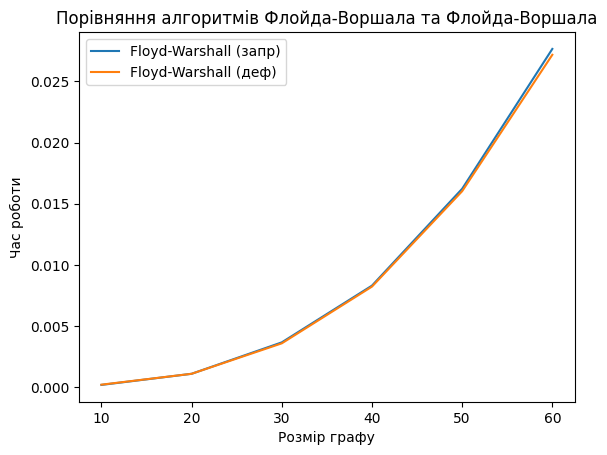

In [ ]:
graph_sizes = [10, 20, 30, 40, 50, 60]
floyd_warshall_prog = [count_time(floyd_warshall_algo, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Флойда-Воршала (запрограмованого)
floyd_warshall_def = [count_time(default_warshall, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Флойда-Воршала (дефолтного)

plt.plot(graph_sizes, floyd_warshall_prog, label='Floyd-Warshall (запр)')
plt.plot(graph_sizes, floyd_warshall_def, label='Floyd-Warshall (деф)')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Флойда-Воршала та Флойда-Воршала')
plt.legend()
plt.show()

В результаті цього експерименту, ми можемо бачити, що алгоритми не різняться в показниках швидкості

### Алгоритм Белмана-Форда

In [ ]:
G = gnp_random_connected_graph(5, 0.6, True, True)

In [ ]:
def bellman_ford(graph, src=0):
    num_nodes = len(graph.nodes())
    distances = [float("inf")] * num_nodes
    distances[src] = 0

    for _ in range(num_nodes - 1):
        for edge in graph.edges(data=True):
            u, v, weight = edge
            if distances[u] != float("inf") and distances[u] + weight["weight"] < distances[v]:
                distances[v] = distances[u] + weight["weight"]

    for edge in graph.edges(data=True):
        u, v, weight = edge
        if distances[u] != float("inf") and distances[u] + weight["weight"] < distances[v]:
            return "Negative cycle detected"
            

    return distances

In [ ]:
def default_belman(graph, src=0):
    final_list = [float('inf') for _ in range(len(graph.nodes))]
    try:
        pred, dist = bellman_ford_predecessor_and_distance(G, 0)
        for k, v in dist.items():
            final_list[k] = v
        return final_list
    except:
        return "Negative cycle detected"

Перевірка правильності

In [ ]:
right_list = []
for i in range(1000):
    G = gnp_random_connected_graph(5, 0.5, True, True)
    bellman_ford_matrix = bellman_ford(G)
    default_belman_matrix = default_belman(G)

    right_list.append(bellman_ford_matrix == default_belman_matrix)

f"Right in a {int(right_list.count(True)/len(right_list)*100)}% of cases"

'Right in a 100% of cases'

В результаті цього експерименту, ми можемо бачити, що алгоритми видають однакивий результат

Порівняння швидкості

100%|██████████| 100/100 [00:00<00:00, 657.90it/s]


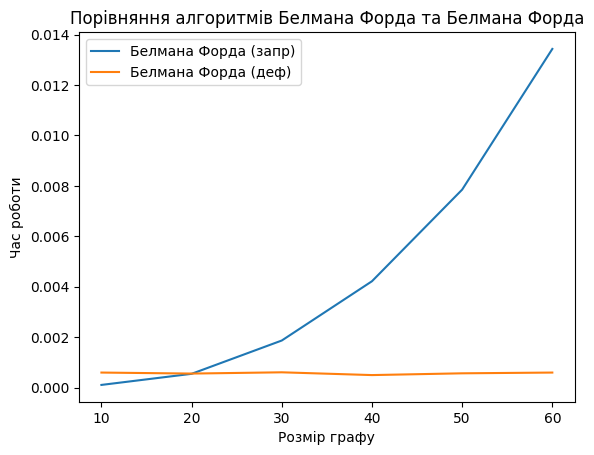

In [ ]:
graph_sizes = [10, 20, 30, 40, 50, 60]
bellman_ford_prog = [count_time(bellman_ford, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Белмана Форда (запрограмованого)
bellman_ford_def = [count_time(default_belman, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Белмана Форда (дефолтного)

plt.plot(graph_sizes, bellman_ford_prog, label='Белмана Форда (запр)')
plt.plot(graph_sizes, bellman_ford_def, label='Белмана Форда (деф)')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Белмана Форда та Белмана Форда')
plt.legend()
plt.show()

Написаний алгоритм показує себе суттєво гірше в плані часу виконання ніж алгоритм модулю

### Порівняння алгоритму Белмана-Форда і Флойда-Воршала

100%|██████████| 100/100 [00:02<00:00, 34.41it/s]


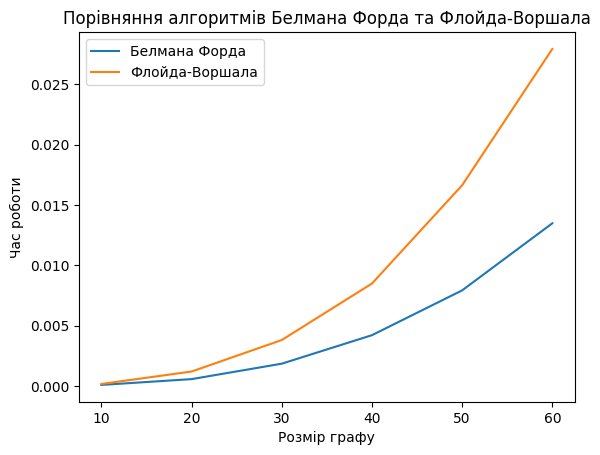

In [ ]:
graph_sizes = [10, 20, 30, 40, 50, 60]
bellman_ford_comp = [count_time(bellman_ford, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Белмана Форда
floyd_warshall_comp = [count_time(floyd_warshall_algo, size) for size in graph_sizes]  # Приклад часу роботи для алгоритму Флойда-Воршала

plt.plot(graph_sizes, bellman_ford_comp, label='Белмана Форда')
plt.plot(graph_sizes, floyd_warshall_comp, label='Флойда-Воршала')
plt.xlabel('Розмір графу')
plt.ylabel('Час роботи')
plt.title('Порівняння алгоритмів Белмана Форда та Флойда-Воршала')
plt.legend()
plt.show()

Алгоритм Белмана-Форда показує себе краще на великих графах

### Висновок

1. Дослідження роботи алгоритмів Белмана-Форда та Флойда-Воршала:
   - Алгоритм Белмана-Форда показав добрі результати на графах з великою кількістю вершин та ребер, включаючи графи з від'ємною вагою ребер.
   - Алгоритм Флойда-Воршала також показав гарні результати, особливо на графах без негативно вагованих циклів.
   - У випадку наявності від'ємно вагованих циклів, алгоритм Белмана-Форда переважає, оскільки він може виявити ці цикли та відповідно обробити їх.


В загальному:
- Алгоритм Прима та Крускала найбільш ефективні на невеликих та середніх розмірах графів.
- Алгоритми Белмана-Форда та Флойда-Воршала найбільш ефективні на великих графах, зокрема, коли необхідно обробляти графи з великою кількістю ребер.

Загальний підсумок:
- Алгоритми, які базуються на принципах жадібного вибору (Прима та Крускала), підходять для менших та середніх розмірів графів.
- Алгоритми, що базуються на матричних операціях (Белмана-Форда та Флойда-Воршала), виявляються більш ефективними для обробки великих графів.
- Цей експеримент надає корисну інформацію для вибору найбільш підходящого алгоритму в залежності від розміру та характеристик графа.